## Khanh Do

## CS109 - 01

## Introduction

In this project, we aim to write functions to analyze the economic well-being data of countries globally in the "indicators.csv" file. To be specific, this file contains seven types of data - corresponding to each column in the table:

- code: unique international three-character code for each country
- year: the following year of the data in the row
- country: English name of the country, including spaces and capitalization
- pop: number of population of each country (millions of people)
- gdp: total gross domestic product of each country (billions of US dollars)
- life: life expectancy of each country (years)
- cell: number of cell phone subscribers of each country (millions of subscribers)

Each row indicates the data of a country's pop, gdp, life, and cell in each given year. This project includes four main parts. Firstly, we write a function to return a dictionary that converts the code type date to the country name. Secondly, we generate two functions to calculate each country's average life expectancy and GDP per Capita. Next, we execute two bar charts illustrating the top 50 countries ranking highest in average life expectancy and GDP per Capita. Finally, we will analyze the performance of some economies in the 21st century (2000 - 2016) based on the ranking of average gdp per capita and life expectancy.

## Part 1: Building Code-to-Country Dictionary

In this part, using the data in the <code>indicators.csv</code> file, we write the function <code>codeToCountryDictionary</code> to generate a dictionary that transforms the CODE - the unique international three-character symbol - to the official English name for each country. First, we need to reset the file by using the code <code>indicatorsFile.seek(0)</code>. We also need to skip the first header line by using the <code>indicatorsFile.readline()</code>. Next, we use the <code>for</code> loop to examine every lines in the file. We will split the data in each line using the <code>line.split(",")</code> and check for the condition that a valid line must have a sufficient number of columns. Finally, after checking the <code>if</code> condition, we update the dictionary by setting the keys and values.

In [1]:
CODE=0
COUNTRY=2

def codeToCountryDictionary(indicatorsFile):
    '''
    Print a dictionary converting the country's code to its English name
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - country's English name
    '''
    L={}                                  # dictionary maps code with country's name
    indicatorsFile.seek(0)                # reset file pointer 
    header=indicatorsFile.readline()      # skip 1st header line
    numCols=len(header.split(","))       
    for line in indicatorsFile:           
        splitLine=line.split(",")         # split based on commas in file
        if len(splitLine)==numCols: 
            # update the dictionary
            code=splitLine[CODE]         
            L[code]=splitLine[COUNTRY]    
    return L

def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToCountryDictionary(file))
    file.close()
main()

{'ABW': 'Aruba', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'AND': 'Andorra', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ASM': 'American Samoa', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh', 'BGR': 'Bulgaria', 'BHR': 'Bahrain', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BMU': 'Bermuda', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'BRB': 'Barbados', 'BRN': 'Brunei Darussalam', 'BTN': 'Bhutan', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHI': 'Channel Islands', 'CHL': 'Chile', 'CHN': 'China', 'CIV': "Cote d'Ivoire", 'CMR': 'Cameroon', 'COL': 'Colombia', 'COM': 'Comoros', 'CPV': 'Cabo Verde', 'CRI': 'Costa Rica', 'CUB': 'Cuba', 'CUW': 'Curacao', 'CYM': 'Cayman Islands', 'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DJI': 'Djibouti

## Part 2: Building Dictionaries for Average Life Expectancy and GDP per Capita

Part 2 consists of writing two functions - <code>codeToAverageLifeExpectancy</code> and <code>codeToAverageGdpPerPop</code> - to execute two dictionaries that illustrate the average Life Expectancy and GDP per Capita for each country. Like part 1, we continue to use the data in the <code>indicatorsFile</code> and reset the file by using the code <code>indicatorsFile.seek(0)</code>. We need to use the <code>for</code> to examine each line in the file. In each line, we split the data and checked for conditions that a valid line must have a sufficient number of columns and the data values must be different from the empty string. Next, we convert the data from the string type to the float type by using the <code>float()</code>. After that, we update the value of the dictionaries in each function that calculates the total life expectancy, total GDP per cap, and the number of years for each country. Finally, we update the resulting dictionaries - the average one - by dividing the total values by the number of years for each country. Moreover, we also need to use the function <code>round(value, 2)</code> to round answers to two decimal places.

In [60]:
CODE=0
POP=3
GDP=4
LIFE=5

def codeToAverageLifeExpectancy(indicatorsFile):
    '''
    Print a dictionary returning the average life expectancy for each country
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - average life expectancy
    '''
    lifeDict={}                # dictionary maps total life expectancy value for each country
    yearDict={}                # dictionary maps number of years that indicate life expectancy value for each country
    averageLifeDict={}         # dictionary maps average life expectancy value for each country
    indicatorsFile.seek(0)     # reset file pointer 
    header=indicatorsFile.readline()        # skip 1st header line
    numCols=len(header.split(","))          
    for line in indicatorsFile:
        splitLine=line.split(",")           # split based on commas in file
        if len(splitLine)==numCols and splitLine[LIFE]!='':     
            code=splitLine[CODE]            
            life=float(splitLine[LIFE])     
            if code not in lifeDict:
                lifeDict[code]=0
                yearDict[code]=0
            # update the key's values for each dictionary
            lifeDict[code]=lifeDict[code]+life      
            yearDict[code]=yearDict[code]+1
    # calculate average life expectancy and update in the resulted dictionary
    for code in lifeDict:
        averageLifeDict[code]=round(lifeDict[code]/yearDict[code], 2)   
    return averageLifeDict

def codeToAverageGdpPerPop(indicatorsFile):
    '''
    Print a dictionary returning the average GDP per Capita for each country
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - average GDP per Capita
    '''
    gdpDict={}                # dictionary maps total gdp per cap value for each country
    yearDict={}               # dictionary maps number of years that indicate gdp value for each country
    gdppercapDict={}          # dictionary maps average gdp per cap value for each country
    indicatorsFile.seek(0)    # reset file pointer 
    header=indicatorsFile.readline()          # skip 1st header line
    numCols=len(header.split(","))            
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")             # split based on commas in file
        if len(splitLine)==numCols and splitLine[POP]!='' and splitLine[GDP]!='':
            code=splitLine[CODE]              
            gdp=float(splitLine[GDP])        
            pop=float(splitLine[POP])        
            gdppercap=round(gdp/pop, 2)       # gdp per cap values
            # update the key's values for each dictionary
            if code not in gdpDict:
                gdpDict[code]=0
                yearDict[code]=0
            gdpDict[code]=gdpDict[code]+gdppercap    
            yearDict[code]=yearDict[code]+1
    # calculate average gdp per cap and update in the resulted dictionary
    for code in gdpDict:
        gdppercapDict[code]=round(gdpDict[code]/yearDict[code], 2)
    return gdppercapDict

def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToAverageLifeExpectancy(file))
    print(codeToAverageGdpPerPop(file))
    file.close()
main()

{'ABW': 72.21, 'AFG': 47.88, 'AGO': 44.29, 'ALB': 71.34, 'ARE': 68.91, 'ARG': 70.93, 'ARM': 70.45, 'ATG': 70.37, 'AUS': 76.29, 'AUT': 74.96, 'AZE': 65.69, 'BDI': 48.65, 'BEL': 75.29, 'BEN': 50.52, 'BFA': 47.49, 'BGD': 58.18, 'BGR': 71.71, 'BHR': 69.68, 'BIH': 70.73, 'BLR': 69.95, 'BLZ': 68.15, 'BMU': 77.96, 'BOL': 54.7, 'BRA': 65.26, 'BRB': 70.07, 'BRN': 71.66, 'BTN': 52.01, 'BWA': 56.98, 'CAF': 45.55, 'CAN': 76.66, 'CHE': 77.24, 'CHI': 75.39, 'CHL': 70.9, 'CHN': 66.28, 'CIV': 47.9, 'CMR': 50.37, 'COL': 67.01, 'COM': 53.86, 'CPV': 63.15, 'CRI': 73.04, 'CUB': 73.95, 'CUW': 76.39, 'CYM': 82.19, 'CYP': 75.8, 'CZE': 72.84, 'DEU': 74.9, 'DJI': 54.54, 'DMA': 73.98, 'DNK': 75.48, 'DOM': 65.41, 'DZA': 62.72, 'ECU': 66.53, 'ERI': 50.62, 'ESP': 76.45, 'EST': 70.72, 'ETH': 48.95, 'FIN': 74.83, 'FJI': 64.36, 'FRA': 76.14, 'FRO': 78.45, 'GAB': 55.64, 'GBR': 75.61, 'GEO': 69.89, 'GHA': 54.63, 'GIN': 46.39, 'GNB': 47.95, 'GNQ': 47.29, 'GRC': 75.43, 'GRD': 67.8, 'GRL': 66.58, 'GTM': 61.15, 'GUM': 71.2

## Part 3: Graphing Top 50 Countries for Highest Life Expectancy and GDP per Capita Averages

In part 3, we need to graph two bar charts that distribute the top 50 nations having the highest average life expectancy and GDP per Capita. First, we need to use the functions from the first two parts, including <code>codeToCountryDictionary</code>, <code>codeToAverageLifeExpectancy</code>, and <code>codeToAverageGdpPerPop</code> to generate three dictionaries that indicate the average values for each country. Then, we use the function <code>rankedKeys()</code> from <code>project4.py</code> file to sort the values of average life expectancy and GDP per Capita. Finally, we plot the bar charts by using the function <code>plotBarGraph()</code>.

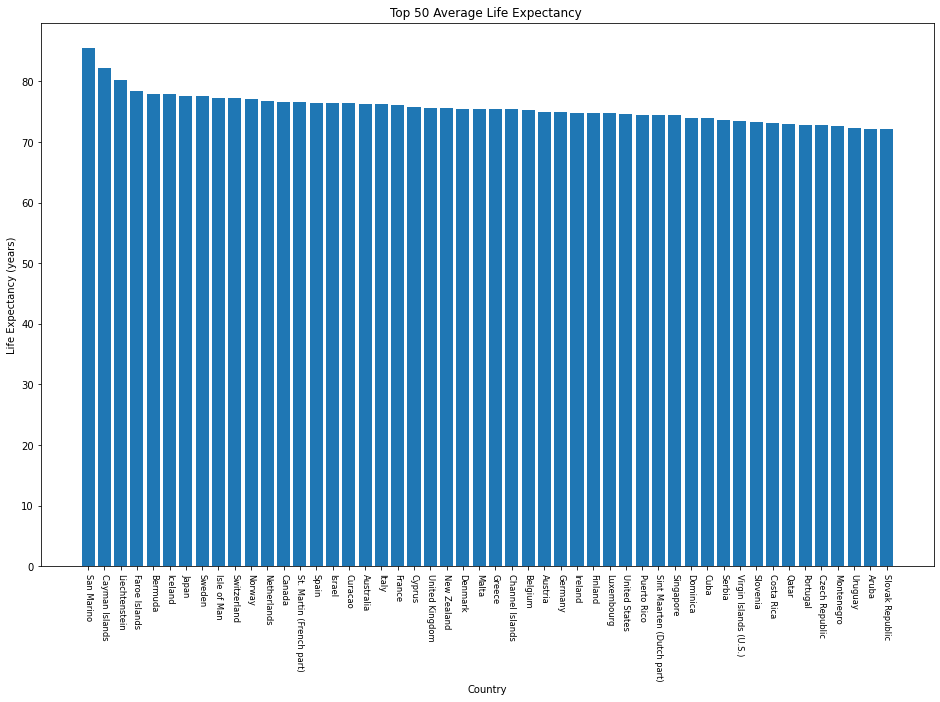

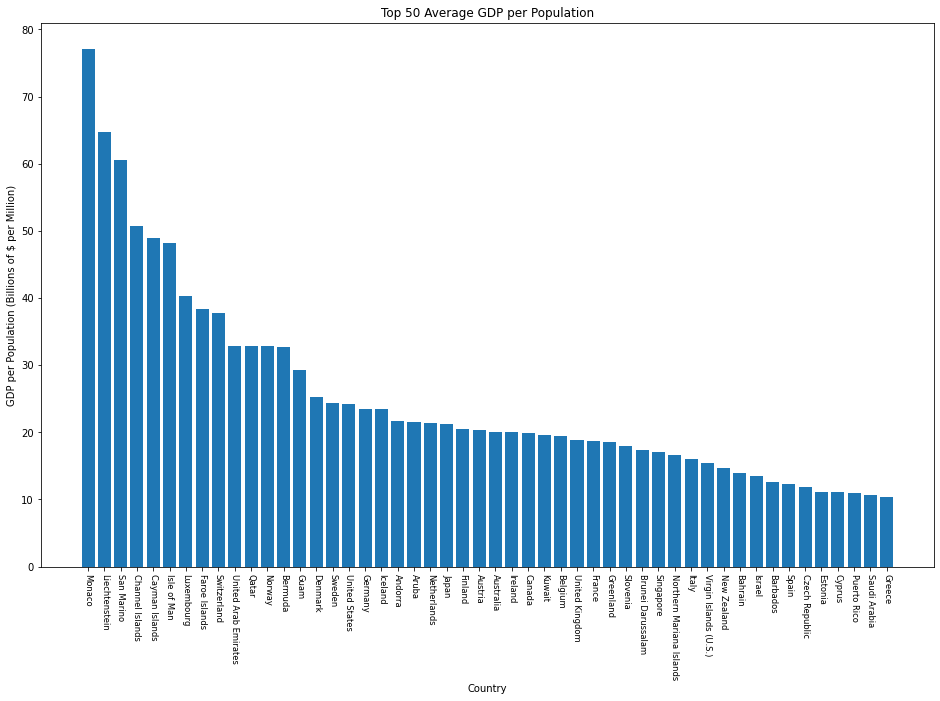

In [59]:
import project4       # import project 4 file
CODE=0
COUNTRY=2
POP=3
GDP=4
LIFE=5

def codeToCountryDictionary(indicatorsFile):
    '''
    Print a dictionary converting the country's code to its English name
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - country's English name
    '''
    L={}                                  # dictionary maps code with country's name
    indicatorsFile.seek(0)                # reset file pointer 
    header=indicatorsFile.readline()      # skip 1st header line
    numCols=len(header.split(","))        
    for line in indicatorsFile:           
        splitLine=line.split(",")         # split based on commas in file
        if len(splitLine)==numCols:       
            # update the dictionary
            code=splitLine[CODE]         
            L[code]=splitLine[COUNTRY]    
    return L

def codeToAverageLifeExpectancy(indicatorsFile):
    '''
    Print a dictionary returning the average life expectancy for each country
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - average life expectancy
    '''
    lifeDict={}                # dictionary maps life expectancy value for each country
    yearDict={}                # dictionary maps number of years that indicate life expectancy value for each country
    averageLifeDict={}         # dictionary maps average life expectancy value for each country
    indicatorsFile.seek(0)     # reset file pointer 
    header=indicatorsFile.readline()        # skip 1st header line
    numCols=len(header.split(","))          
    for line in indicatorsFile:
        splitLine=line.split(",")           
        if len(splitLine)==numCols and splitLine[LIFE]!='':     
            code=splitLine[CODE]            
            life=float(splitLine[LIFE])     
            if code not in lifeDict:
                lifeDict[code]=0
                yearDict[code]=0
            # update the key's values for each dictionary
            lifeDict[code]=lifeDict[code]+life      
            yearDict[code]=yearDict[code]+1
    # calculate average life expectancy and update in the resulted dictionary
    for code in lifeDict:
        averageLifeDict[code]=round(lifeDict[code]/yearDict[code], 2)   
    return averageLifeDict

def codeToAverageGdpPerPop(indicatorsFile):
    '''
    Print a dictionary returning the average GDP per Capita for each country
    
    Parameter: file indicatorsFile
    Return value: dictionary with key - country's code and value - average GDP per Capita
    '''
    gdpDict={}                # dictionary maps gdp per cap value for each country
    yearDict={}               # dictionary maps number of years that indicate gdp value for each country
    gdppercapDict={}          # dictionary maps average gdp per cap value for each country
    indicatorsFile.seek(0)    # reset file pointer 
    header=indicatorsFile.readline()          # skip 1st header line
    numCols=len(header.split(","))            
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")             
        if len(splitLine)==numCols and splitLine[POP]!='' and splitLine[GDP]!='':
            code=splitLine[CODE]              
            gdp=float(splitLine[GDP])        
            pop=float(splitLine[POP])         
            gdppercap=round(gdp/pop, 2)       
            # update the key's values for each dictionary
            if code not in gdpDict:
                gdpDict[code]=0
                yearDict[code]=0
            gdpDict[code]=gdpDict[code]+gdppercap     # total gdp per cap
            yearDict[code]=yearDict[code]+1
    # calculate average gdp per cap and update in the resulted dictionary
    for code in gdpDict:
        gdppercapDict[code]=round(gdpDict[code]/yearDict[code], 2)
    return gdppercapDict

def highestLifeExpectancyPlot(indicatorsFile):
    '''
    Ploting a bar graph illustrating top 50 countries based highest average life expectancy
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    rankedLifeExpect=[]      # list indicating ranked average life expectancy 
    rankedCountry=[]         # list indicating ranked country's code based on average life expectancy
    # generate dictionaries - average life expectancy, country's code
    country=codeToCountryDictionary(indicatorsFile)
    lifeExpect=codeToAverageLifeExpectancy(indicatorsFile)
    # update the ranked lists
    rankedCountrycode=project4.rankedKeys(lifeExpect)
    for nation in rankedCountrycode:
        rankedCountry.append(country[nation])
        rankedLifeExpect.append(lifeExpect[nation])
    # plot the bar chart
    project4.plotBarGraph(rankedCountry[:50], rankedLifeExpect[:50], \
                          "Top 50 Average Life Expectancy ", "Country", "Life Expectancy (years)")
    
def highestAverageGDPperPop(indicatorsFile):
    '''
    Ploting a bar graph illustrating top 50 countries based highest average gdp per cap
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    rankedGDP=[]               # list indicating ranked average gdp per cap 
    rankedCountry=[]           # list indicating ranked country's code based on average gdp per cap
    # generate dictionaries - average gdp per cap, country's code
    country=codeToCountryDictionary(indicatorsFile)
    GDPperPop=codeToAverageGdpPerPop(indicatorsFile)
    # update the ranked lists
    rankedCountrycode=project4.rankedKeys(GDPperPop)
    for nation in rankedCountrycode:
        rankedCountry.append(country[nation])
        rankedGDP.append(GDPperPop[nation])
    # plot the bar chart
    project4.plotBarGraph(rankedCountry[:50], rankedGDP[:50], "Top 50 Average GDP per Population",\
                         "Country", "GDP per Population (Billions of $ per Million)")
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    highestLifeExpectancyPlot(file)
    highestAverageGDPperPop(file)
    file.close()
main()

## Part 4: Which countries with the highest living standard have the best economic growth performance from 2000 to 2016?

Life expectancy and GDP per Capita are two factors that best measure the quality of living standard for each country. While life expectancy is the number of years a person can expect to live, GDP per cap measures the gross domestic product - total income generated by economic activities in a country - per population. A country with a higher life expectancy and GDP per capita will have better economic well-being and living conditions. After executing two bar charts illustrating the top 50 countries that have the highest average Life expectancy and GDP per Capita, we can see that some major countries that have the highest living standard by placing in the top places of both bar charts are San Marino, Liechtenstein, Switzerland, Japan, and Norway. While Switzerland, Japan, and Norway are known as OECD countries - economically developed countries, San Marino and the Liechtenstein are just developing small nations in European. In this part, we will examine the performance in the economic growth of these five nations from 2000 to 2016 and compare the difference the well-being between OECD and non-OECD countries.

To examine the economic growth performance, we write the function <code>codeToGdpGrowthRate</code> to generate a line graph illustrating each country's annual GDP growth rate from 2000 - 2016. First, we execute a list of each country's annual GDP in the period. Then, we create a list of GDP growth rates by using the formula: <code>GDP growth rate(t)=(GDP(t)-GDP(t-1))/GDP(t-1)*100</code>. Finally, we use the functions from the library <code>matplotlib.pyplot</code> to plot the line graph demonstrating annual GDP growth from 2000 to 2016. Noticeably, we also need to round the GDP growth rates to two decimal places by using the function <code>round(value, 2)</code>.

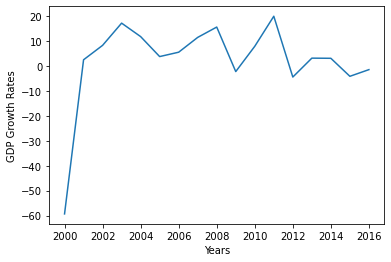

None


In [52]:
import matplotlib.pyplot as pyplot      
CODE=0
COUNTRY=2
POP=3
GDP=4
def codeToGdpGrowthRate_Switzerland(indicatorsFile):
    '''
    Plot the line graph illustrating annual GDP growth rates from 2000 to 2016
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    gdpList=[]                            # list used to store values of gdp
    gdpgrowthrate=[]                      # list used to store values of gdp growth rates
    yearsList=[]                          # list used to store values of years
    indicatorsFile.seek(0)                # reset file pointer 
    header=indicatorsFile.readline()      # skip 1st header line
    numCols=len(header.split(","))
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")
        year=int(splitLine[1])
        if len(splitLine)==numCols and splitLine[GDP]!='' and year>=2000 and splitLine[COUNTRY]=='Switzerland':
            gdp=float(splitLine[GDP])          # update the list of gdp values
            gdpList.append(gdp) 
            yearsList.append(year)
    # update the list of gdp growth rates
    for i in range(len(gdpList)):
        rate=(gdpList[i]-gdpList[i-1])*100/gdpList[i-1]
        gdpgrowthrate.append(round(rate, 2))
    # plot the line graph
    pyplot.plot(yearsList, gdpgrowthrate)
    pyplot.xlabel('Years')
    pyplot.ylabel('GDP Growth Rates')
    pyplot.show()
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToGdpGrowthRate_Switzerland(file))
    file.close()
main()

Based on the graph, we can see that Switzerland has stable economic growth and that its economy rose positively in most of the period. Notably, the highest peak of the graph was in 2011, with 19.84%. There was fluctuation over the periods due to some events like the global financial crisis in 2008; however, it is clearly seen that there were recoveries over time. Switzerland is also an economic well-being country that ranks 9th in the top highest GDP per cap and 10th in the top highest life expectancy.

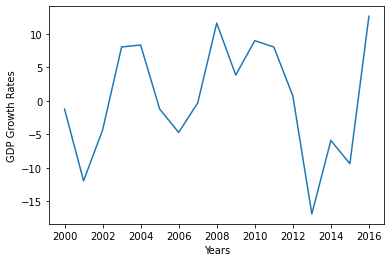

In [1]:
import matplotlib.pyplot as pyplot
CODE=0
COUNTRY=2
POP=3
GDP=4
def codeToGdpGrowthRate_Japan(indicatorsFile):
    '''
    Plot the line graph illustrating annual GDP growth rates from 2000 to 2016
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    gdpList=[]                             # list used to store values of gdp
    gdpgrowthrate=[]                       # list used to store values of gdp growth rates
    yearsList=[]                           # list used to store values of years
    indicatorsFile.seek(0)                 # reset file pointer 
    header=indicatorsFile.readline()       # skip 1st header line
    numCols=len(header.split(","))
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")
        year=int(splitLine[1])
        if len(splitLine)==numCols and splitLine[GDP]!='' and year>=2000 and splitLine[COUNTRY]=='Japan':
            gdp=float(splitLine[GDP])       # update the list of gdp values
            gdpList.append(gdp)
            yearsList.append(year)
    # update the list of gdp growth rates
    for i in range(len(gdpList)):
        rate=(gdpList[i]-gdpList[i-1])*100/gdpList[i-1]
        gdpgrowthrate.append(round(rate, 2))
    # plot the line graph
    pyplot.plot(yearsList, gdpgrowthrate)
    pyplot.xlabel('Years')
    pyplot.ylabel('GDP Growth Rates')
    pyplot.show()
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    codeToGdpGrowthRate_Japan(file)
    file.close()
main()

The graph shows Japan had the highest growth rate in 2016, with 12.61%. However, Japan had a slower growth rate compared to other OECD countries. Most of the growth rates were negative and below 10. This could be easily understood since this nation rarely experienced deflation. However, this economy gained a high rank in life expectancy, in 7th place.

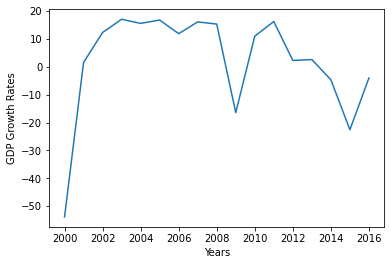

None


In [2]:
import matplotlib.pyplot as pyplot
CODE=0
COUNTRY=2
POP=3
GDP=4
def codeToGdpGrowthRate_Norway(indicatorsFile):
    '''
    Plot the line graph illustrating annual GDP growth rates from 2000 to 2016
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    gdpList=[]                             # list used to store values of gdp
    gdpgrowthrate=[]                       # list used to store values of gdp growth rates
    yearsList=[]                           # list used to store values of years
    indicatorsFile.seek(0)                 # reset file pointer 
    header=indicatorsFile.readline()       # skip 1st header line
    numCols=len(header.split(","))
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")
        year=int(splitLine[1])
        if len(splitLine)==numCols and splitLine[GDP]!='' and year>=2000 and splitLine[COUNTRY]=='Norway':
            gdp=float(splitLine[GDP])      # update the list of gdp values
            gdpList.append(gdp)
            yearsList.append(year)
    # update the list of gdp growth rates
    for i in range(len(gdpList)):
        rate=(gdpList[i]-gdpList[i-1])*100/gdpList[i-1]
        gdpgrowthrate.append(round(rate, 2))
    # plot the line graph
    pyplot.plot(yearsList, gdpgrowthrate)
    pyplot.xlabel('Years')
    pyplot.ylabel('GDP Growth Rates')
    pyplot.show()
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToGdpGrowthRate_Norway(file))
    file.close()
main()

Looking at the above line graph, Norway had strong economic growth, with most rates above 10%. The highest rate was roughly 17% in 2003. This economy also experienced two economic slowdowns, one in 2008 due to the global financial crisis and one in 2015. After that, this economy had recovered by increasing robustly in 2009 and 2016. Besides stable growth, Norway also has a relatively high standard of living, ranking 11th in average life expectancy and 12th in average GDP per cap.

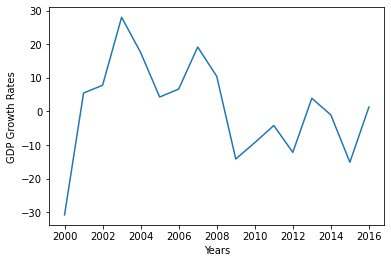

None


In [3]:
import matplotlib.pyplot as pyplot
CODE=0
COUNTRY=2
POP=3
GDP=4
def codeToGdpGrowthRate_SanMarino(indicatorsFile):
    '''
    Plot the line graph illustrating annual GDP growth rates from 2000 to 2016
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    gdpList=[]                         # list used to store values of gdp
    gdpgrowthrate=[]                   # list used to store values of gdp growth rates
    yearsList=[]                       # list used to store values of years
    indicatorsFile.seek(0)             # reset file pointer 
    header=indicatorsFile.readline()   # skip 1st header line
    numCols=len(header.split(","))
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")
        year=int(splitLine[1])
        if len(splitLine)==numCols and splitLine[GDP]!='' and year>=2000 and splitLine[COUNTRY]=='San Marino':
            gdp=float(splitLine[GDP])   # update the list of gdp values
            gdpList.append(gdp)
            yearsList.append(year)
    # update the list of gdp growth rates
    for i in range(len(gdpList)):
        rate=(gdpList[i]-gdpList[i-1])*100/gdpList[i-1]
        gdpgrowthrate.append(round(rate, 2))
    # plot the line graph
    pyplot.plot(yearsList, gdpgrowthrate)
    pyplot.xlabel('Years')
    pyplot.ylabel('GDP Growth Rates')
    pyplot.show()
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToGdpGrowthRate_SanMarino(file))
    file.close()
main()

San Marino had the highest GDP growth rate, with 28% in 2003, the highest record compared to other countries. This country also has stable growth in the first half period. However, there was likely a slowdown in the economy later, and the growth rates decreased afterward. Despite this, this non-OECD country has relatively high living conditions, placing 1st in average life expectancy and 3rd in average GDP per cap.

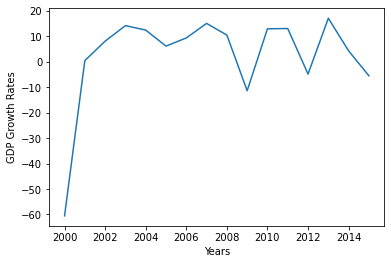

None


In [4]:
import matplotlib.pyplot as pyplot
CODE=0
COUNTRY=2
POP=3
GDP=4
def codeToGdpGrowthRate_Liechtenstein(indicatorsFile):
    '''
    Plot the line graph illustrating annual GDP growth rates from 2000 to 2016
    
    Parameter: file indicatorsFile
    Return value: None
    '''
    gdpList=[]                                   # list used to store values of gdp
    gdpgrowthrate=[]                             # list used to store values of gdp growth rates
    yearsList=[]                                 # list used to store values of years
    indicatorsFile.seek(0)                       # reset file pointer 
    header=indicatorsFile.readline()             # skip 1st header line
    numCols=len(header.split(",")) 
    gdp=0
    for line in indicatorsFile:
        splitLine=line.split(",")
        year=int(splitLine[1])
        if len(splitLine)==numCols and splitLine[GDP]!='' and year>=2000 and splitLine[COUNTRY]=='Liechtenstein':
            gdp=float(splitLine[GDP])            # update the list of gdp values
            gdpList.append(gdp)
            yearsList.append(year)
    # update the list of gdp growth rates
    for i in range(len(gdpList)):
        rate=(gdpList[i]-gdpList[i-1])*100/gdpList[i-1]
        gdpgrowthrate.append(round(rate, 2))
    # plot the line graph
    pyplot.plot(yearsList, gdpgrowthrate)
    pyplot.xlabel('Years')
    pyplot.ylabel('GDP Growth Rates')
    pyplot.show()
def main():
    fileName="indicators.csv"
    file=open(fileName, "r", encoding="utf-8")
    print(codeToGdpGrowthRate_Liechtenstein(file))
    file.close()
main()

Liechtenstein had healthy economic growth, and most growth rates are positive. The highest rate was in 2014, with 17.03%. There were also some slight fluctuations: the economy decreased in 2009 due to the global financial crisis and another in 2012. However, this economy had recovered by expanding slightly in 2010 and 2013. This country also has a high condition of living, placing 2nd in average GDP per cap and 3rd in average life expectancy.

In essence, although Liechtenstein and San Marino are not OECD countries, these countries seemed to have higher living standards and doing economy better than some OECD countries like Japan - one of the strongest economy in Asia. Many developing countries, however, do not have such a robust market and so much wealth. Moreover, San Marino was the country that marked the highest GDP growth rates in this period. Otherwise, OECD countries, including Switzerland and Norway, had a well-being economy that was good in maintaining the stability of economic growth and recovering the economy from the financial issue and crises.